# Telco Churn Prediction

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# Business Understanding

With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.

**Question to answer:**
1. What variables are contributing to customer churn?
2. Who are the customers more likely to churn?
3. What actions can be taken to stop them from leaving?

# Data Understanding

1. `Churn`: 1-customer cancelled service, 0-continue
2. `AccountWeeks`: number of weeks customer has had active account
3. `ContractRenewal`: 1-recently renew, 0-not renew
4. `Data Plan`: 1-with data plan, 0-no data plan
5. `DataUsage`: gigabytes(GB) of monthly data usage
6. `CustServCalls`: number of calls into customer service
7. `DayMins`: average daytime minutes per month
8. `DayCalls`: average number of daytime calls
9. `MonthlyCharge`: average monthly bill
10. `OverageFee`: largest overage fee in last 12 months
11. `RoamMins`: average number of roaming minutes 

In [8]:
df = pd.read_csv('telecom_churn.csv')

In [9]:
df.shape

(3333, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [11]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [12]:
# null, duplicate, unique value 
print('Null Value Check:')
print(df.isnull().sum())
print('-' *50)
print('Duplicate Value Check:')
print(df.duplicated().sum())
print('-' *50)
print('Unique Value Check:')
print(df.nunique())

Null Value Check:
Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64
--------------------------------------------------
Duplicate Value Check:
0
--------------------------------------------------
Unique Value Check:
Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64


In [13]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Modelling 

## Decision Tree 

In [16]:
X = df.drop(columns=['Churn'] ) 
y = df['Churn'] 

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],         # Criterion for splitting (Gini or Entropy)
    'max_depth': [3, 5, 10, None],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider for the best split
}

# Create decision tree model 
dt_model = DecisionTreeClassifier(random_state=42) 

# set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, n_jobs=1, scoring='accuracy', cv=5, verbose=1) 

# Fit the model using GridSearchCV to find the best parameter 
grid_search.fit(X_train, y_train) 

# Best parameter 
print('Best parameter:', grid_search.best_params_) 

# Get the best model from the grid_search 
best_dt_model = grid_search.best_estimator_ 

# Make predictions on the test set 
y_pred = best_dt_model.predict(X_test) 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameter: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


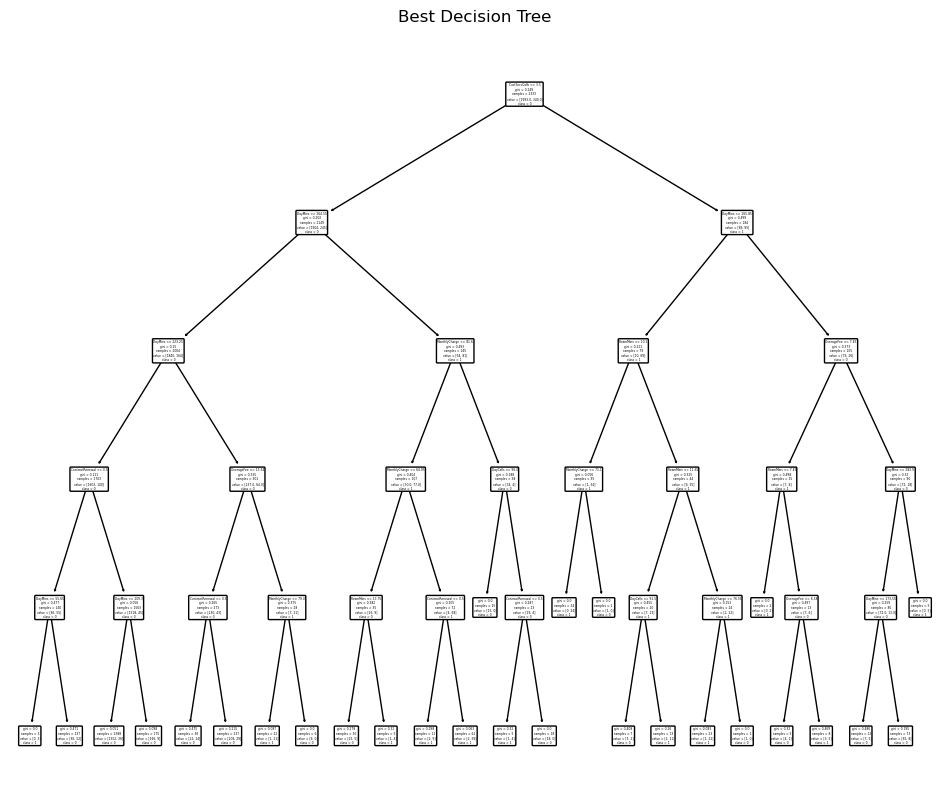

<Figure size 640x480 with 0 Axes>

In [17]:
# Visualize the best dt model 
plt.figure(figsize=(12,10)) 
plot_tree(best_dt_model, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True)
plt.title('Best Decision Tree') 
plt.show()

# Save the plot as a high-resolution image
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')  # Save as PNG

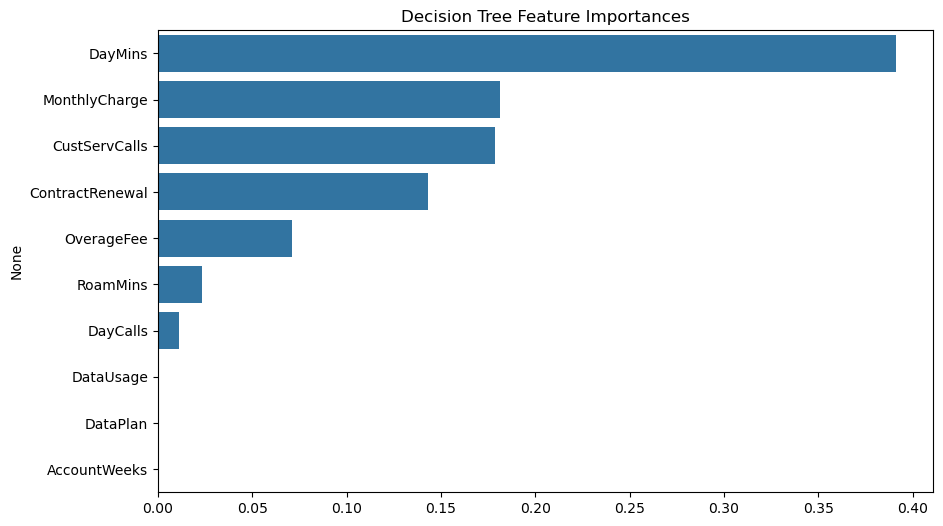

In [18]:
# Get feature importances 
importances = best_dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Decision Tree Feature Importances')
plt.show()

In [19]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.901

Confusion Matrix:
[[837  20]
 [ 79  64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       857
           1       0.76      0.45      0.56       143

    accuracy                           0.90      1000
   macro avg       0.84      0.71      0.75      1000
weighted avg       0.89      0.90      0.89      1000



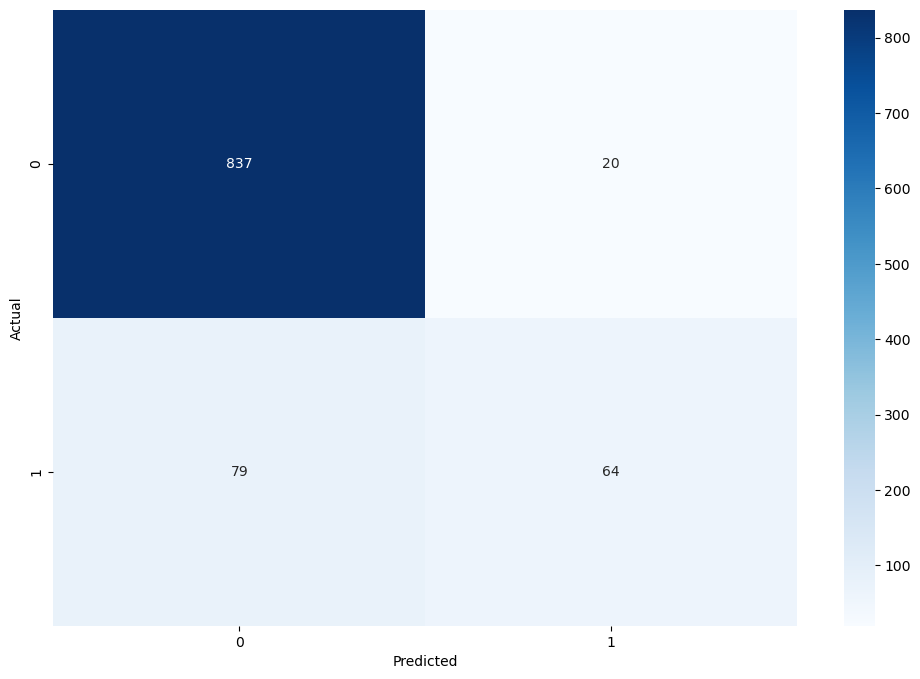

In [20]:
# Visualize confusion matrix 
confusion_mat = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(12,8)) 
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show() 

In [21]:
# Create result df 
model_result = {
    'model' : 'Decision_Tree',
    'accuracy': accuracy_score(y_test,y_pred), 
    'precision': precision_score(y_test,y_pred), 
    'recall': recall_score(y_test,y_pred), 
    'f1_score': f1_score(y_test,y_pred)
}

# Append the result 
result_df = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1_score'])
# Convert the model_result dictionary to a DataFrame and concatenate
result_df = pd.concat([result_df, pd.DataFrame([model_result])], ignore_index=True)

In [22]:
# Display 3 decimal place
pd.options.display.float_format = '{:.3f}'.format
result_df

,model,accuracy,precision,recall,f1_score
0,Decision_Tree,0.901,0.762,0.448,0.564


## Logistic Regression

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, random_state=42) 

# Logistic regression with gradient descent 
log_model = LogisticRegression(solver='saga', max_iter=1000) 

# Fit the model 
log_model.fit(X_train, y_train) 

# Make prediction on test model 
y_pred = log_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.867

Confusion Matrix:
 [[838  19]
 [114  29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.20      0.30       143

    accuracy                           0.87      1000
   macro avg       0.74      0.59      0.62      1000
weighted avg       0.84      0.87      0.84      1000



In [49]:
# Get coefficients
coefficients = log_model.coef_[0]
# Calculate odds ratios (exponentiate the coefficients)
odds_ratios = np.exp(coefficients)
features = X.columns

# Create a DataFrame of features and their importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Absolute Importance': np.abs(coefficients),
    'Odds Ratio': odds_ratios
}).sort_values(by='Absolute Importance', ascending=False)

print(importance_df)

           Feature  Coefficient  Absolute Importance  Odds Ratio
4    CustServCalls        0.650                0.650       1.916
1  ContractRenewal       -0.622                0.622       0.537
5          DayMins        0.488                0.488       1.629
2         DataPlan       -0.377                0.377       0.686
9         RoamMins        0.277                0.277       1.319
8       OverageFee        0.270                0.270       1.310
7    MonthlyCharge        0.241                0.241       1.273
3        DataUsage       -0.202                0.202       0.817
0     AccountWeeks        0.022                0.022       1.023
6         DayCalls       -0.003                0.003       0.997


**Positive Influence**
- CustServCalls, DayMins, RoamMins, OverageFee, MonthlyCharge, AccountWeeks

**Negative Influence**
- ContractRenewal, DataPlan, DataUsage

**Explanation (e.g., First 2 features):**
-

**CustServCalls:**
--
- `Positive Coefficient(0.65)`: A positive coefficient means that as the number of customer service calls increases, the log-odds of being churn(1) increase. In other words, higher number of customer service calls make it more likely for the customer to churn or cancel the service
- `Odds Ratio(1.916)`: The odds ratio of 1.916 means that each unit increase in number of customer service calls, the odds of being churn(1) increase by 91.6%.

**ContractRenewal:**
--
- `Negative Coefficient (-0.622)`: A negative coefficient means the log-odds of being churn decrease when the customer renew the contract recently(=1).

- `Odds Ratio (0.537)`: The odds ratio of 0.537 means that the odds of churn(1) decrease by 56.3%. This is because the odds ratio is less than 1, indicating a negative impact on the likelihood of being churn.



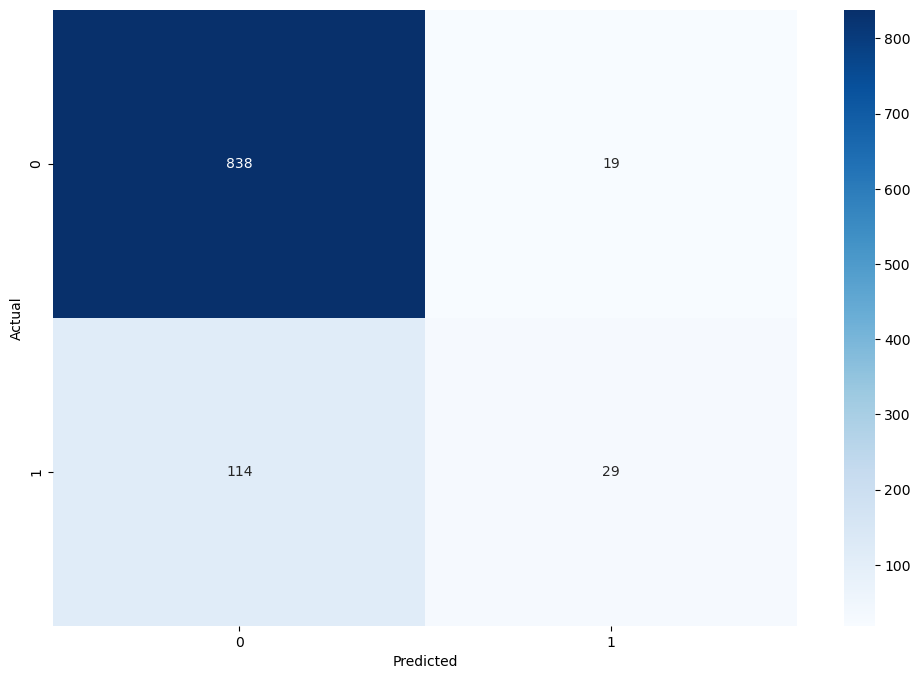

In [28]:
# Visualize confusion matrix 
confusion_mat = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(12,8)) 
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show() 

In [29]:
# Create result df 2
model_result2 = {
    'model' : 'Logistic Regression',
    'accuracy': accuracy_score(y_test,y_pred), 
    'precision': precision_score(y_test,y_pred), 
    'recall': recall_score(y_test,y_pred), 
    'f1_score': f1_score(y_test,y_pred)
}

# Append the result 
result_df = pd.concat([result_df, pd.DataFrame([model_result2])], ignore_index=True)
print(result_df)

                 model  accuracy  precision  recall  f1_score
0        Decision_Tree     0.901      0.762   0.448     0.564
1  Logistic Regression     0.867      0.604   0.203     0.304
